In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import os
train_path = "/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train"
test_path = "/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test"
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt"),delim_whitespace=True,header=None)

subject_train = pd.read_csv(os.path.join(train_path,"/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/subject_train.txt"),delim_whitespace=True,header=None)
y = pd.read_csv(os.path.join(train_path,"/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/y_train.txt"),delim_whitespace=True,header=None)
for subject in np.unique(subject_train.values):
    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]
    for label in np.unique(labels.values):
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))
        label_idxs = labels[labels.iloc[:,0] == label].index
        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")

total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt"),delim_whitespace=True,header=None)
subject_test = pd.read_csv(os.path.join(test_path,"/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/subject_test.txt"),delim_whitespace=True,header=None)
y = pd.read_csv(os.path.join(test_path,"/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/y_test.txt"),delim_whitespace=True,header=None)
for subject in np.unique(subject_test.values):
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]
        for label in np.unique(labels.values):
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
            label_idxs = labels[labels.iloc[:,0] == label].index
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)
print("Done Combining the testing data")
print("Done Combining the data")
save_path = os.path.join("/content/drive/MyDrive/Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")


/tmp/ipython-input-2579973295.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt"),delim_whitespace=True,header=None)
/tmp/ipython-input-2579973295.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt"),delim_whitespace=True,header=None)
/tmp/ipython-input-2579973295.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(

Done Combining the training data


/tmp/ipython-input-2579973295.py:46: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt"),delim_whitespace=True,header=None)
/tmp/ipython-input-2579973295.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt"),delim_whitespace=True,header=None)
/tmp/ipython-input-2579973295.py:48: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_p

Done Combining the testing data
Done Combining the data


In [14]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [2]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00


**1)** Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

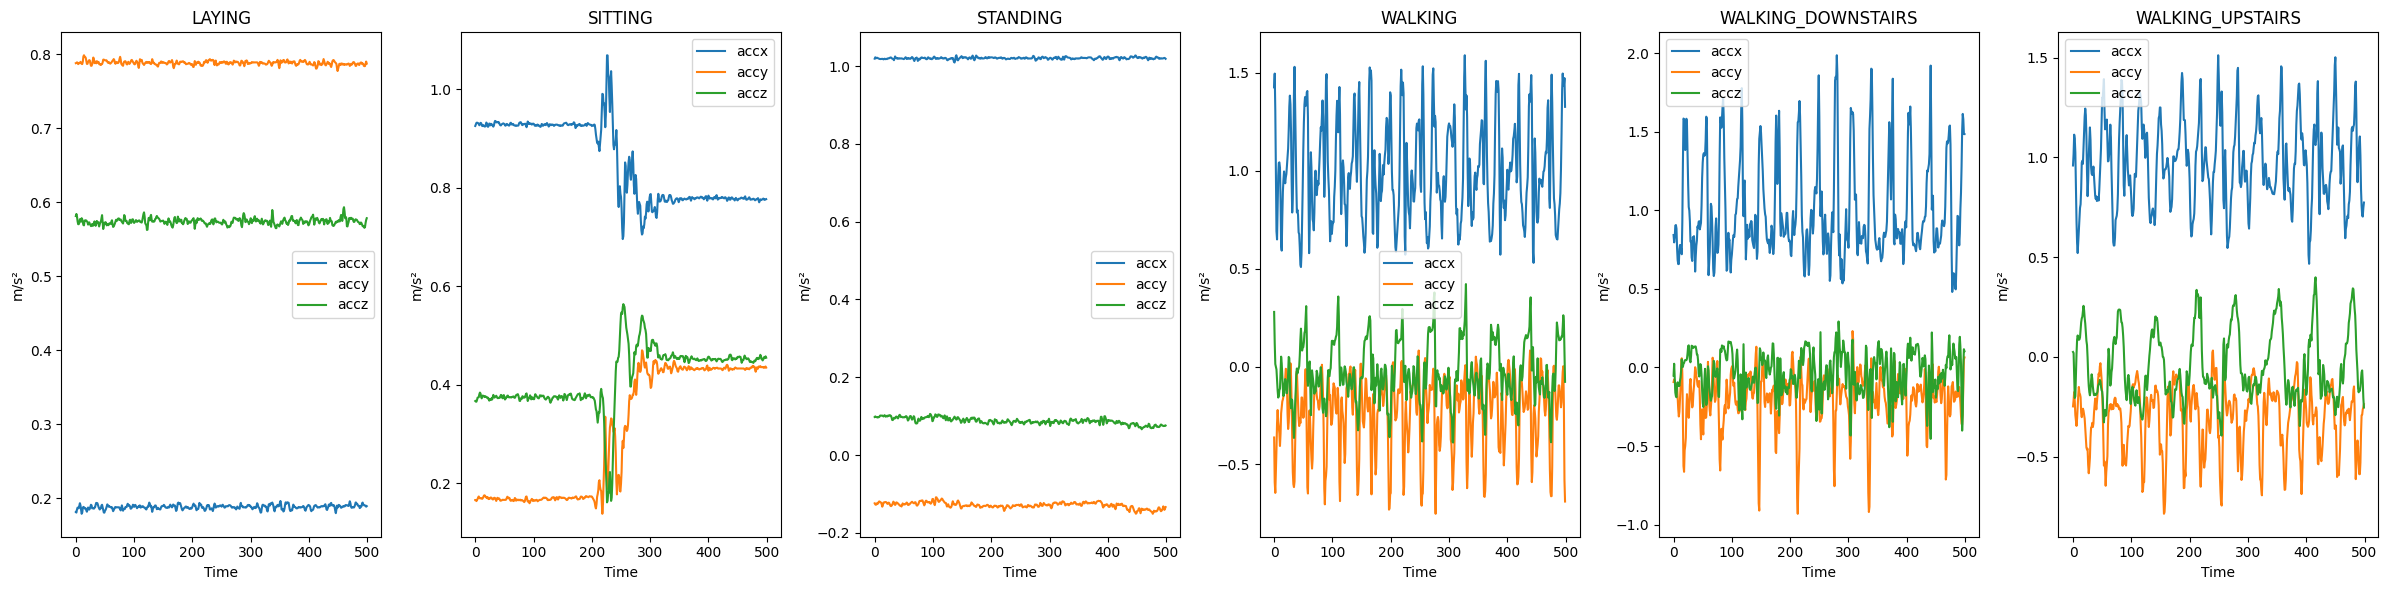

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
activities=["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
data={act: pd.read_csv(f"/content/Combined/Train/{act}/Subject_1.csv")
        for act in activities}
def plot_waveform(df, title, ax):
    for axis in ["accx", "accy", "accz"]:
        ax.plot(df[axis][:500], label=axis)
    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("m/s²")
    ax.legend()
fig, axs=plt.subplots(1, len(activities), figsize=(24, 6))
for ax,act in zip(axs,activities):
    plot_waveform(data[act],act,ax)
plt.tight_layout()
plt.show()


When we plot one sample from each activity, we see that static ones like laying, sitting, and standing have flat signals with small differences in baseline.
Dynamic activities like walking, walking upstairs, and walking downstairs show clear wave-like patterns, with stairs having sharper or different rhythms.
This makes it easier to separate static from dynamic activities.
But static activities themselves are harder to tell apart since they look more similar.
To classify them well, the model will need good features like mean, variance, and signal orientation along with clean, balanced data.

**Q2)** Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration
(
a
c
c
x
2
+
a
c
c
y
2
+
a
c
c
z
2
)
 for each activity and justify your answer.

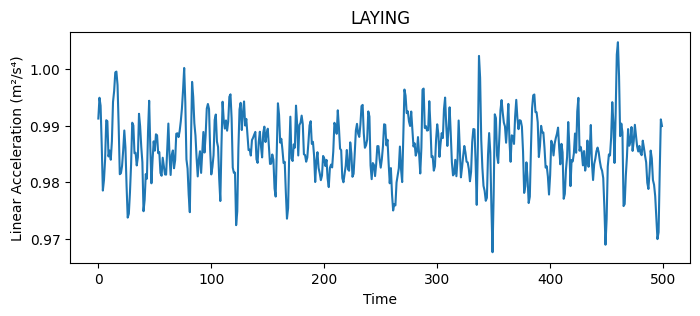

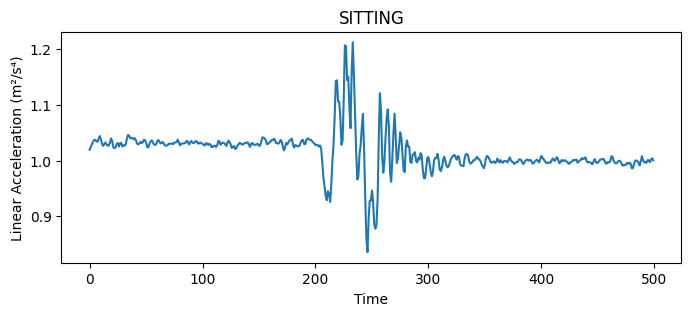

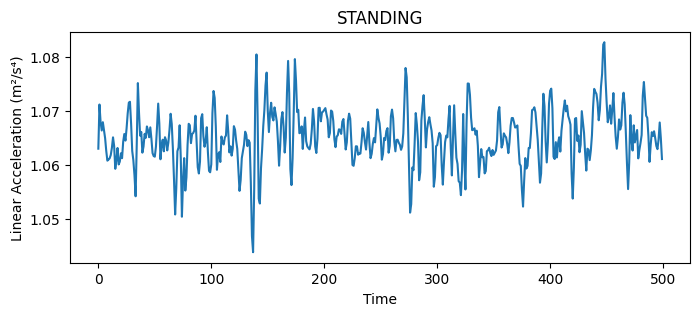

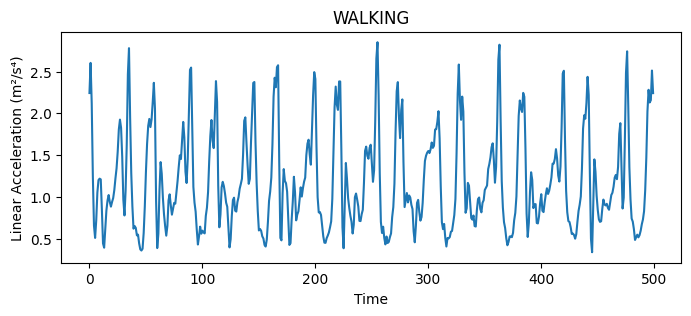

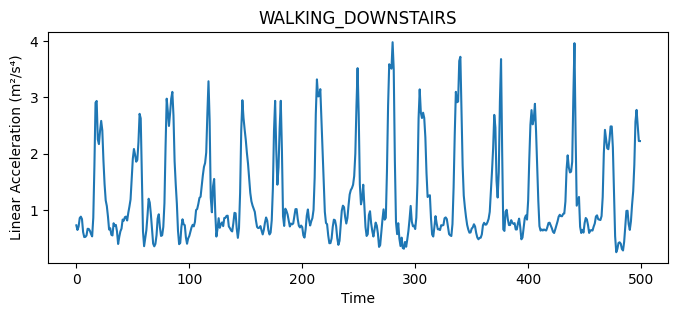

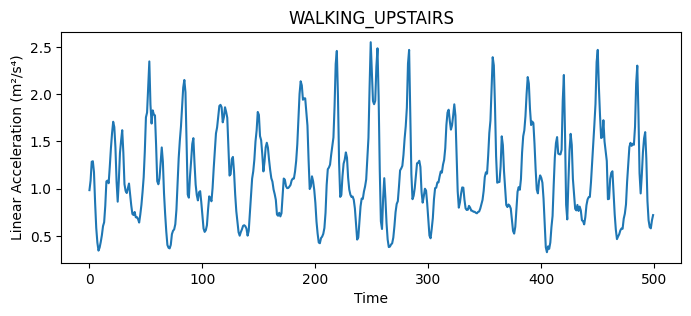

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

LAYING=pd.read_csv("/content/Combined/Train/LAYING/Subject_1.csv")
SITTING=pd.read_csv("/content/Combined/Train/SITTING/Subject_1.csv")
STANDING=pd.read_csv("/content/Combined/Train/STANDING/Subject_1.csv")
WALKING=pd.read_csv("/content/Combined/Train/WALKING/Subject_1.csv")
WALKING_DOWN=pd.read_csv("/content/Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
WALKING_UP=pd.read_csv("/content/Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")

activities={"LAYING": LAYING,"SITTING": SITTING,"STANDING": STANDING,"WALKING": WALKING,"WALKING_DOWNSTAIRS": WALKING_DOWN,"WALKING_UPSTAIRS": WALKING_UP}

for name, data in activities.items():
    data["linear_acc"] = data['accx']**2 + data['accy']**2 + data['accz']**2
    plt.figure(figsize=(8,3))
    plt.plot(data["linear_acc"][:500])
    plt.title(name)
    plt.xlabel("Time")
    plt.ylabel("Linear Acceleration (m²/s⁴)")
    plt.show()


When we look at the linear acceleration
, static activities like laying, sitting, and standing remain almost flat, while dynamic ones such as walking or climbing stairs show strong variations. This makes it possible to separate static from dynamic activities with simple thresholds or rules. However, the differences between dynamic activities themselves are much more subtle, so a machine learning model is needed to capture these fine patterns and classify them accurately.

**Q3)** **Visualize the data using PCA.**

1) Use PCA (Principal Component Analysis) on Total Acceleration
(accx2+accy2+accz2)
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

(126, 500)
(126,)


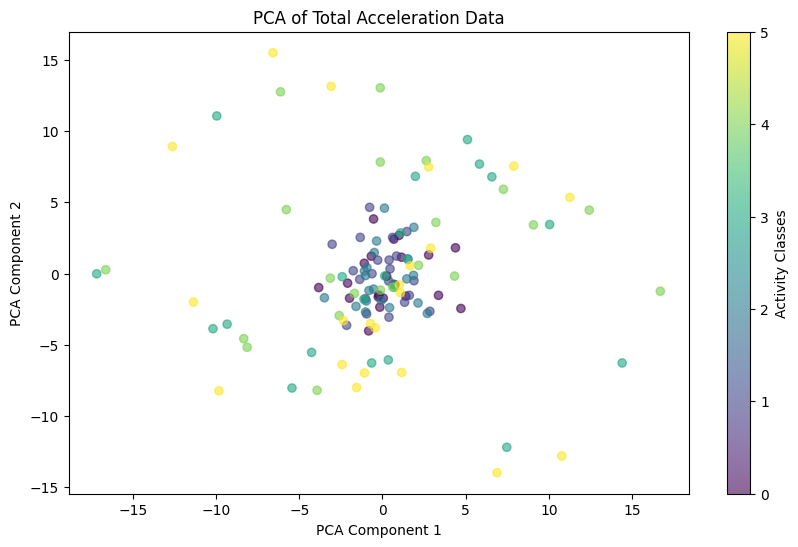

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

activity_dirs = {'LAYING': "/content/Combined/Train/LAYING",
    'SITTING': "/content/Combined/Train/SITTING",
    'STANDING': "/content/Combined/Train/STANDING",
    'WALKING': "/content/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/Combined/Train/WALKING_UPSTAIRS"
}
samples=[]
labels=[]

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]

        total_acceleration = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        total_acceleration=(total_acceleration-total_acceleration.mean())/total_acceleration.std()

        samples.append(total_acceleration)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)
print(samples.shape)
print(labels.shape)

flattened_data = samples.reshape(len(samples), -1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of Total Acceleration Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

2) Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


/tmp/ipython-input-2582121161.py:46: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df)


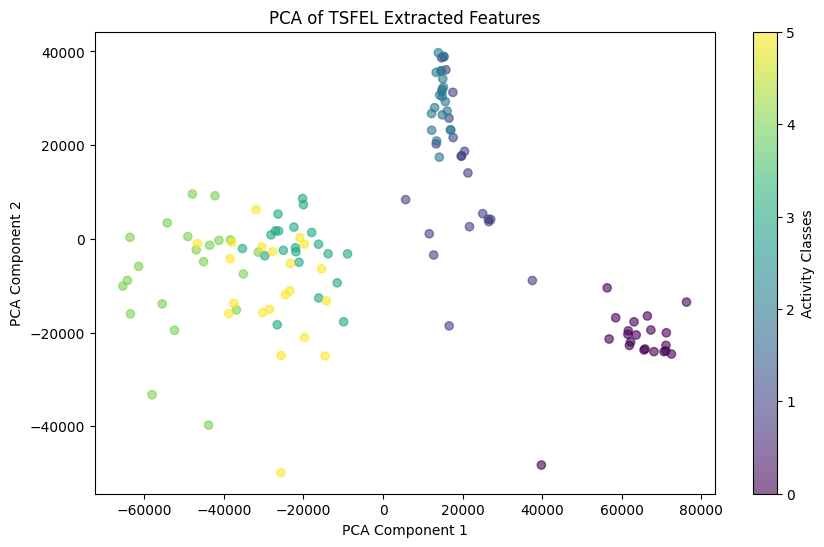

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tsfel
from sklearn.decomposition import PCA
activity_dirs = {
    'LAYING': "/content/Combined/Train/LAYING",
    'SITTING': "/content/Combined/Train/SITTING",
    'STANDING': "/content/Combined/Train/STANDING",
    'WALKING': "/content/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/Combined/Train/WALKING_UPSTAIRS"
}
features_list=[]
labels=[]
for activity, path in activity_dirs.items():
    files = os.listdir(path)
    for file in files:
        file_path = os.path.join(path, file)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        df = pd.DataFrame({
            "acc_x": acc_x,
            "acc_y": acc_y,
            "acc_z": acc_z
        })
        cfg = tsfel.get_features_by_domain()
        feats = tsfel.time_series_features_extractor(cfg, df)
        features_list.append(feats.values.flatten())
        labels.append(activity)

features_array = np.array(features_list)
labels = np.array(labels)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)
plt.figure(figsize=(10, 6))
activity_list = list(activity_dirs.keys())
colors = [activity_list.index(a) for a in labels]
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=colors, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Activity Classes")
plt.title("PCA of TSFEL Extracted Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


3) Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

/tmp/ipython-input-2719399224.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
/tmp/ipython-input-2719399224.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])


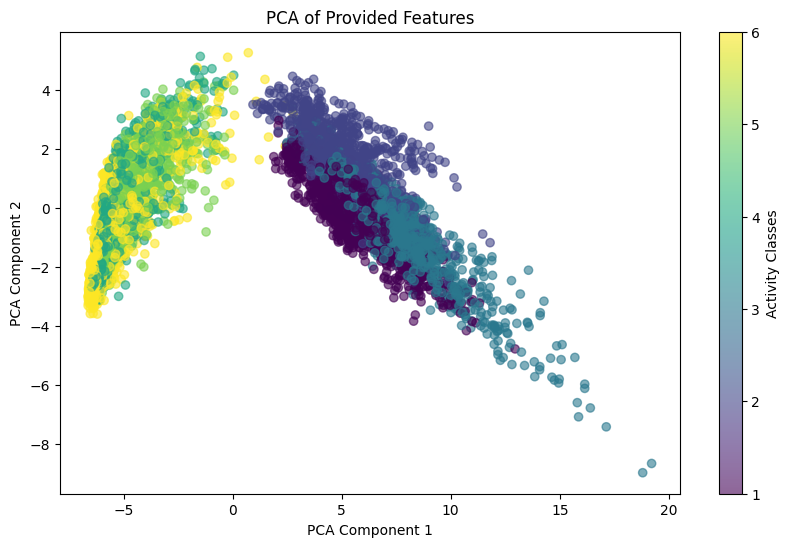

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features_path="/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/features.txt"
with open(features_path, 'r') as f:
    feature_names = [line.strip().split()[1] for line in f.readlines()]
X_train_path="/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/X_train.txt"
y_train_path="/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/y_train.txt"

X_train=pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train.columns=feature_names

y_train=pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_train)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train['Activity'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of Provided Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

4) Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

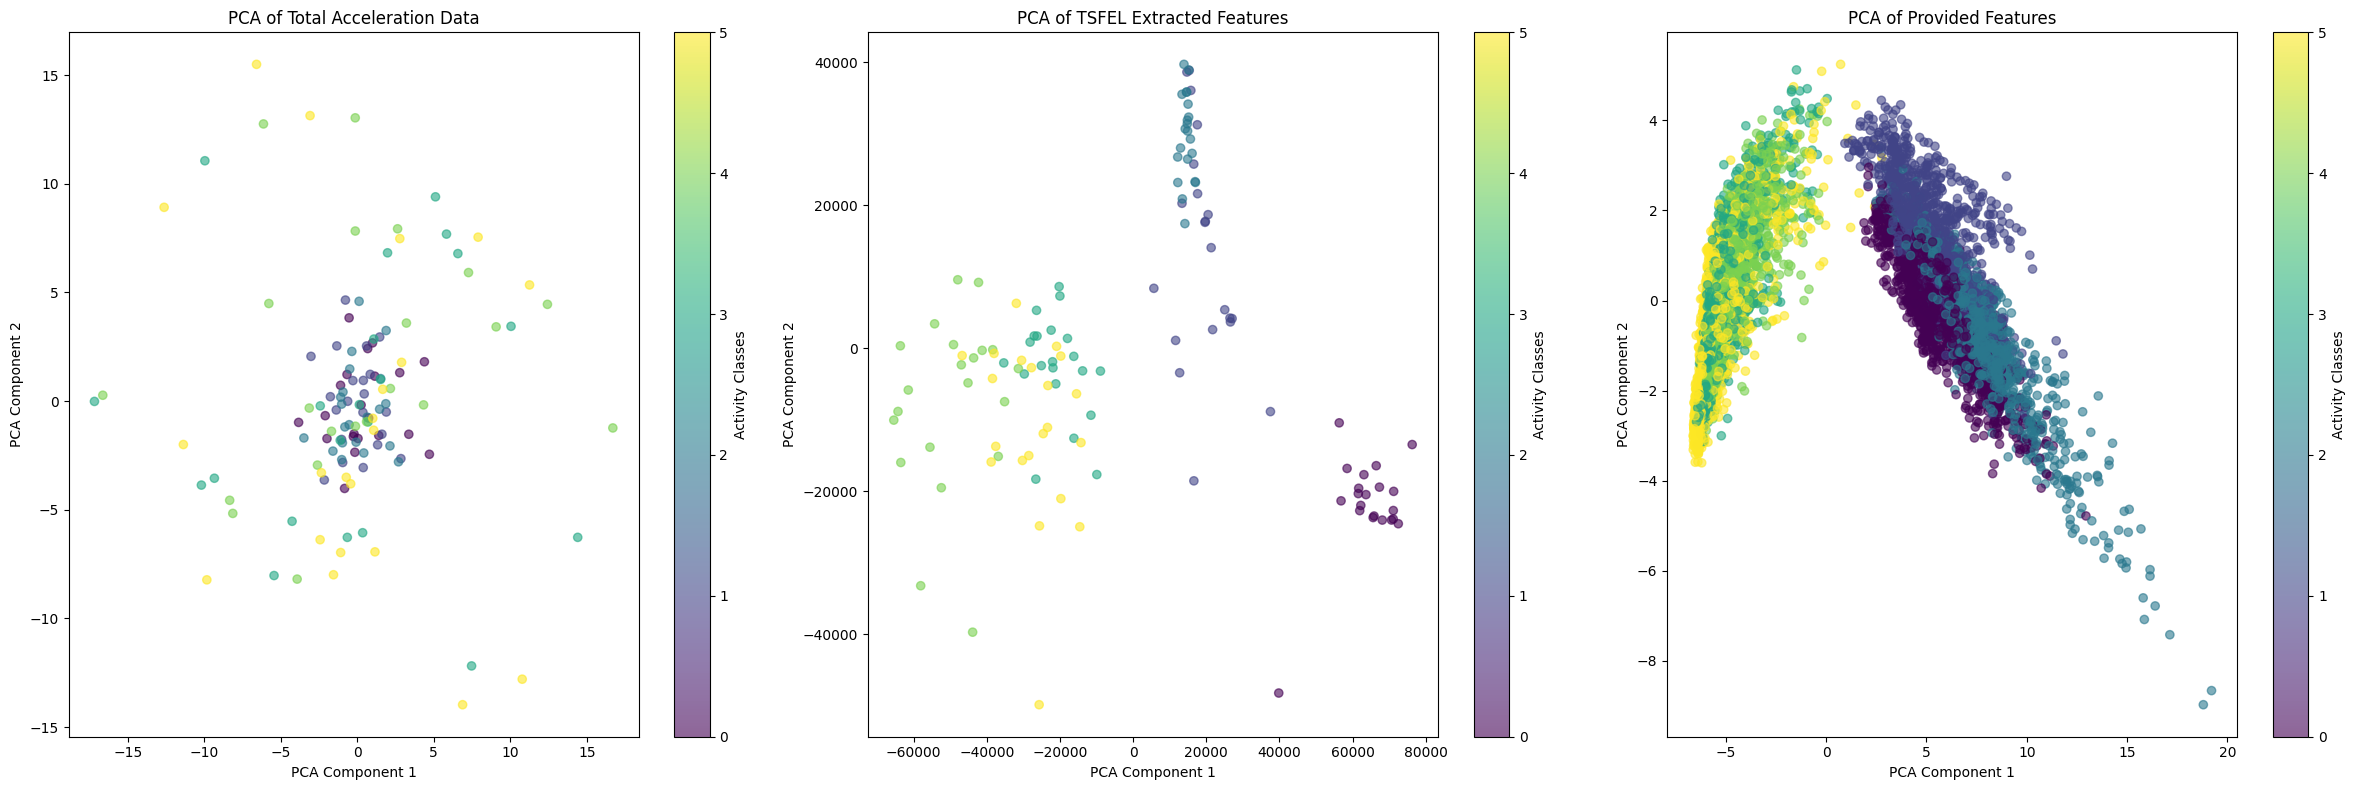

In [ ]:
pca_total_acc = PCA(n_components=2)
pca_result_total_acc = pca_total_acc.fit_transform(flattened_data)


pca_tsfel = PCA(n_components=2)
pca_result_tsfel = pca_tsfel.fit_transform(features_array)

pca_dataset = PCA(n_components=2)
X_pca = pca_dataset.fit_transform(X_train)

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

scatter_total_acc = axs[0].scatter(pca_result_total_acc[:, 0], pca_result_total_acc[:, 1],
                                   c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels],
                                   cmap='viridis', alpha=0.6)
axs[0].set_title('PCA of Total Acceleration Data')
axs[0].set_xlabel('PCA Component 1')
axs[0].set_ylabel('PCA Component 2')
fig.colorbar(scatter_total_acc, ax=axs[0], label='Activity Classes')

scatter_tsfel = axs[1].scatter(pca_result_tsfel[:, 0], pca_result_tsfel[:, 1],
                               c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels],
                               cmap='viridis', alpha=0.6)
axs[1].set_title('PCA of TSFEL Extracted Features')
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')
fig.colorbar(scatter_tsfel, ax=axs[1], label='Activity Classes')

scatter_dataset = axs[2].scatter(X_pca[:, 0], X_pca[:, 1],
                                 c=y_train['Activity'] - 1,
                                 cmap='viridis', alpha=0.6)
axs[2].set_title('PCA of Provided Features')
axs[2].set_xlabel('PCA Component 1')
axs[2].set_ylabel('PCA Component 2')
fig.colorbar(scatter_dataset, ax=axs[2], label='Activity Classes')

plt.tight_layout()
plt.show()

For visualization and class separation, TSFEL or dataset-provided features are much better than raw total acceleration. TSFEL is nice if you want interpretable features (you can see which statistics matter).
Dataset-provided features are best if you just want clean separation, but harder to explain.

**Question 4)** Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

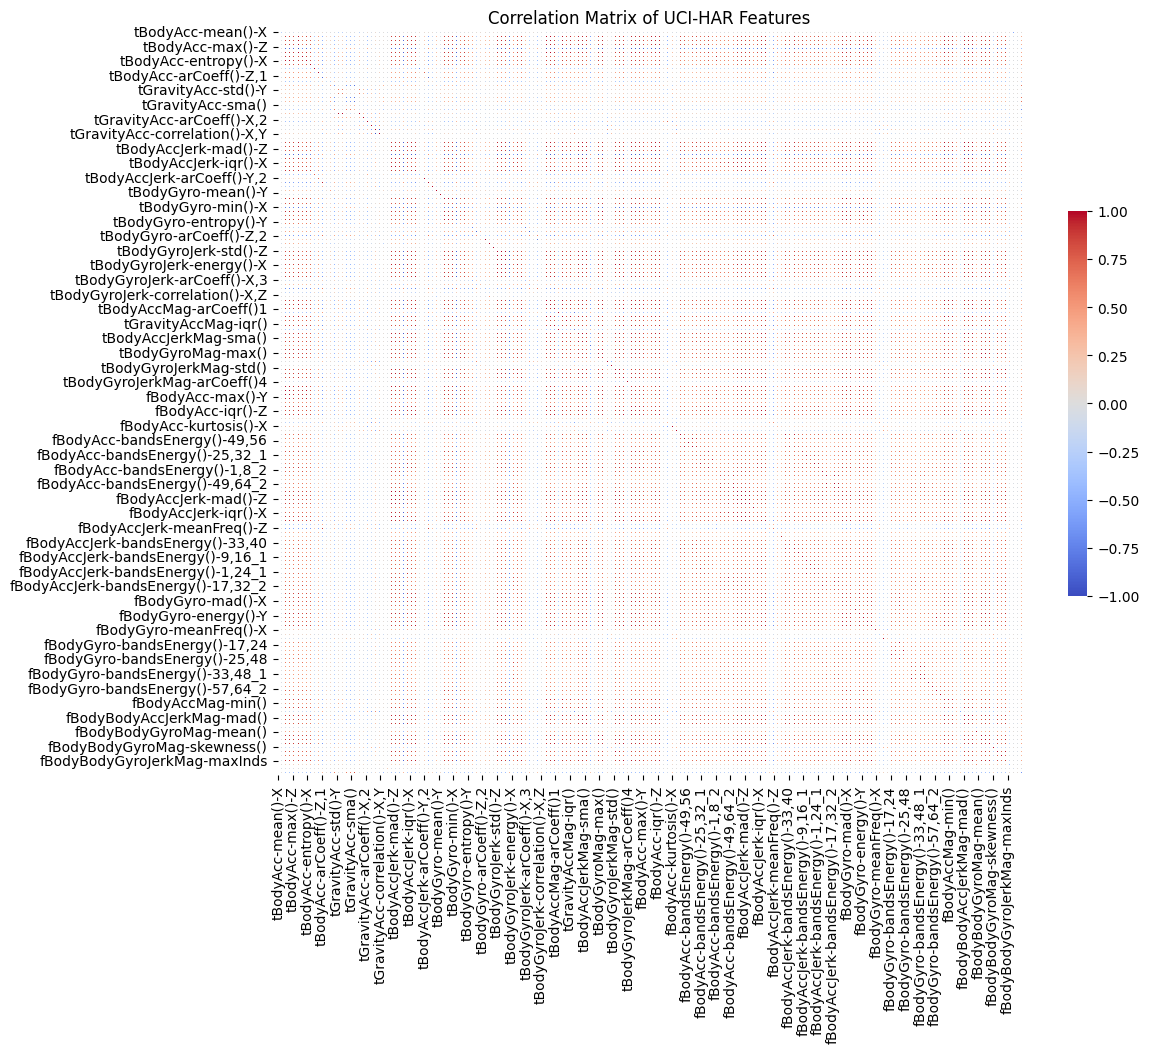

Top 20 most highly correlated feature pairs:
                          Feature1                   Feature2  Correlation  \
156556     fBodyBodyGyroMag-mean()     fBodyBodyGyroMag-sma()          1.0   
92104           tBodyAccMag-mean()          tBodyAccMag-sma()          1.0   
92472            tBodyAccMag-std()       tGravityAccMag-std()          1.0   
92112           tBodyAccMag-mean()      tGravityAccMag-mean()          1.0   
92117           tBodyAccMag-mean()       tGravityAccMag-sma()          1.0   
109498     tBodyGyroJerkMag-mean()     tBodyGyroJerkMag-sma()          1.0   
96706        tGravityAccMag-mean()       tGravityAccMag-sma()          1.0   
155373          fBodyAccMag-mean()          fBodyAccMag-sma()          1.0   
96366       tBodyAccMag-arCoeff()4  tGravityAccMag-arCoeff()4          1.0   
101139      tBodyAccJerkMag-mean()      tBodyAccJerkMag-sma()          1.0   
156049  fBodyBodyAccJerkMag-mean()  fBodyBodyAccJerkMag-sma()          1.0   
93897            tB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x_train_path = "/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/X_train.txt"
y_train_path = "/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/train/y_train.txt"
features_path = "/content/drive/MyDrive/UCI HAR dataset 1/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_path, sep=r"\s+", header=None, usecols=[1])[1].tolist()

seen = {}
unique_features = []
for f in feature_names:
    if f not in seen:
        seen[f] = 1
        unique_features.append(f)
    else:
        unique_features.append(f + "_" + str(seen[f]))
        seen[f] += 1
feature_names = unique_features

X_train = pd.read_csv(x_train_path, sep=r"\s+", header=None, names=feature_names)
y_train = pd.read_csv(y_train_path, sep=r"\s+", header=None, names=['Activity'])
df = pd.concat([X_train, y_train], axis=1)

corr_matrix = df.iloc[:, :-1].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix of UCI-HAR Features")
plt.show()

corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs = (
    corr_matrix_upper
    .stack()
    .reset_index()
    .rename(columns={0: "Correlation", "level_0": "Feature1", "level_1": "Feature2"})
)
corr_pairs["AbsCorrelation"] = corr_pairs["Correlation"].abs()
corr_pairs_sorted = corr_pairs.sort_values(by="AbsCorrelation", ascending=False)
print("Top 20 most highly correlated feature pairs:")
print(corr_pairs_sorted.head(20))


